# 04_classification_algorithms

Finally we reach this point! Today we're gonna talk about some classic algorithms. We would know some fundamental strategies for machine to develop the decision rules

Special thanks to Prof Galit's materials.

## Recall  
(1) Classification: $x_1,x_2,x_3...(numerical\ or\ categorical features) \to y(categorical)$  
(2) Data spliting: training data and testing data

## 4 Types of Classification Methods
### Lazy: refer to similiar past records 
E.g. K-nearest neighbor
### Probalistic: determine and aggregate possibilities based on features 
E.g. Naive Bayes
### Function:  $y = f(\beta_0+\beta_1 x_1 + \beta_2 x_2+...\beta_m x_m) = f(x'\beta)$ 
E.g. logistics regression, neural network, support vector machine(SVM)
### Rule: if x1>2, then predict y = 1 
E.g. Decision Tree

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

---

# K-Nearest Neighbor

KNN extend the concept from the baseline "same past value". For each prediction, KNN consider K past simliar records.

## Instinct
<div><img src="./KNN.png" width="400"/><center>source: Prof Galit's slide</center></div>


## How to predict?
1. Computes **distance** between the to-be-classified record and each record in the training set 
2. Finds the k shortest distances (=nearest neighbors) 
3. Computes votes of the k neighbors 


## Distance?
2-norm distance:  
$d(Cust_1,Cust_2) = \sqrt[2]{\sum_{i=1}^{n}(x_{1i}-x_{2i})^2} $

## Let's see an example

In [2]:
data = pd.read_csv("../datasets/Classified Data",index_col=0) # Source: Jose's course
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:

# data spliting
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1], random_state=2)

In [4]:
# What's the prediction for the record in testing set?
one_test_record = X_test.iloc[0]
one_test_record_target = y_test.iloc[0]
one_test_record.to_frame().T

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
37,0.980029,1.443144,0.795675,0.515047,0.749091,0.813808,0.9292,0.700359,1.491739,1.303429


In [5]:
one_test_record_target

1

In [6]:
# let's see some records in our training set
X_train.iloc[0:3]

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
673,1.400234,1.101308,0.681746,0.875100,1.232452,0.978446,1.346576,0.937818,1.584306,1.439056
107,0.762276,0.889916,1.405941,0.852789,0.871521,1.251893,1.203790,1.202766,1.446743,1.618650
898,1.269450,1.034816,0.606526,0.911736,1.337390,1.151023,0.925295,0.711809,1.698904,1.223230


In [7]:
# These are the target class for them
y_train.iloc[0:3].to_frame()

,TARGET CLASS
673,1
107,0
898,1


In [8]:
print("distance(train.iloc[0],one_test_record) is %s"%np.linalg.norm(X_train.iloc[0]-one_test_record))
print("distance(train.iloc[1],one_test_record) is %s"%np.linalg.norm(X_train.iloc[1]-one_test_record))
print("distance(train.iloc[2],one_test_record) is %s"%np.linalg.norm(X_train.iloc[2]-one_test_record))


distance(train.iloc[0],one_test_record) is 0.9769019427268215
distance(train.iloc[1],one_test_record) is 1.2149407840153896
distance(train.iloc[2],one_test_record) is 0.9761866777406537


train.iloc[2] is the nearest among the first 3 records in training set.  
--> if our training set contains only 3 records, we may guess one_test_record have the same target class as train.iloc[2]'s target class, which is 1

train.iloc[0] and train.iloc[2] are the nearest among the first 3 records in training set.  
--> if our training set contains only 3 records, we may guess one_test_record have the same target class as the **majority** of train.iloc[0] and train.iloc[2] target class, which is also 1

so what is the true target class for one_test_record?

In [9]:
one_test_record_target

1

## Using KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5) # make 5 nearest records to vote
knn_clf.fit(X_train,y_train)
knn_clf.predict(X_test.iloc[[0]])

array([1])

## Questions for Data Scientist
- How many neighbors to consider? How to determine K ?
- How to compute the distance if there is categorical variable? 
- How to choose the distance?
- How to vote among K neighbors?
- How to get prediction probabilities for each class?
- Watch out for the scale of the variable -> standardization
- Watch out for the dimensionality of the variables-> drop or dimension reduction

## Pros & cons 
### pros
- simple, could be our advanced baseline
- easy to understand
- good performance if variables good

### cons
- no feature importance
- computation expensive


-----
# Little tutorial: how to use machine learning model in sklearn?
sklearn is perhaps the most popular ML package in Python. The modeling algorithms (and data processing methods) could be called in the simliar steps:
- step 1: import the module
- step 2: create an empty model shell with some setting
- step 3: fit the model
- step 4: use fitted model to predict new data

### example:
```python
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5) # make 5 nearest records to vote
knn_clf.fit(X_train,y_train)
knn_clf.predict(X_test.iloc[0])
```

-----
# Naive Bayes
Naive Bayes also extend the concept from the baseline "same past value". For each prediction, NB consider past simliar records in a probalistic way


## Instinct: contingency table

example: victim - defendant - death penalty
<div><img src="./NB.png" width="400"/><center>source: Prof Galit's course</center></div>

$P(Death = 1|victim = white) = ?$  
$P(Death = 1|defandant = white) = ?$   
$P(Death = 1|victim = white \cap defandant = white) = ?$

## How to predict?
 <div><img src="./NB2.png" width="600"/><center>source: Prof Galit's course</center></div>
 
## Look at the example above
(see whiteboard)

## Using Naive Bayes
(The demo is skipped caused the sklearn categoricalNB is still under developement)

## Questions for Data Scientist
- How to compute the probability if there is numerical variable? --> binning or make distribution assumption
- How to capture joint effect --> Bayes net

## Pros & cons 
### pros
- Simple
- Can handle large amount of predictors
- High performance accuracy, when the goal is ranking
- Pretty robust to conditional independence assumption!

### cons
- numerical variable handling
- variables with "rare" category
- Gives biased probability of class membership
- No feature importance


---
# Logistics regression

Though the "regression" in its name, it's a classification method. Logistic regression is one of the simplest and commonly used function-based classification methods.

## Instict
For function type method, most of the time we have the form $y = f(\beta_0 + \beta_1 x_1 + \beta_2 x_2+...\beta_m x_m)$  This form is so-called generalized linear regression(GLM). The function $f(.)$ is called a link function.

### Example
Suppose we want to find the function between hours of study and whether a student passing the exam. 
- Is linear regression a good idea for this problem?
- In previous lessons we had seen linear regression, which is logically equivalent to $f(a) = a$. 
- What does it mean when prediction > 1 or prediction <0? 
- We want to have a good link function so that we can make the prediction transform into [0,1] or [-1,1] for binary classification.  

### odds and logit
- $Let\ y = P(target = 1)$. Thus $y \in [0,1]$   
- $odds = \frac{p}{1-p}$ Thus  $odds \in R^+$  
- $logit = \ln{\frac{p}{1-p}}$ Thus $logit \in R$  


### Logistic regression
In linear regression, we have:  
$ y = \beta_0+\beta_1 x_1+\beta_2 x_2 ... \beta_m x_m = x' \beta$  

In logistic regression we replace y with logit(or you could view as adding some link function on the right)  
$ logit =  \beta_0+\beta_1 x_1+\beta_2 x_2 ... \beta_m x_m = x' \beta$  

### How to predict? 
Reorganize the equation above, we have:  
- $y\ = f(x'\beta) = {\frac  {e^{{x'\beta }}}{1+e^{{x'\beta }}}}$     
Given $y \in [0,1]$we may use cutoff value to make conservative/progressive predictions

 <div><img src="./logistic_reg.jpeg" width="600"/></div>

For more reference you could refer to [邏輯回歸](https://zh.wikipedia.org/wiki/%E9%82%8F%E8%BC%AF%E8%BF%B4%E6%AD%B8) in wikipedia, or google "logistic regression".

## Using logistic regresssion
We will use the same data

In [11]:
X_train.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
673,1.400234,1.101308,0.681746,0.875100,1.232452,0.978446,1.346576,0.937818,1.584306,1.439056
107,0.762276,0.889916,1.405941,0.852789,0.871521,1.251893,1.203790,1.202766,1.446743,1.618650
898,1.269450,1.034816,0.606526,0.911736,1.337390,1.151023,0.925295,0.711809,1.698904,1.223230
441,0.856182,0.954198,1.003692,0.704575,1.370083,0.660489,1.603258,1.346338,0.900570,1.379398
439,1.246932,0.951219,0.970844,0.991451,1.337472,0.737863,0.775657,1.065203,1.727781,1.410941


In [12]:
from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train,y_train)

LogisticRegression()

What are the coefficients for the variables? Aka $\beta_1...\beta_{10}$

In [13]:
logreg_clf.coef_

array([[ 3.09574188, -2.83143649, -4.04070014,  0.41443487, -0.66737286,
        -1.60129471, -1.34320651, -2.83651228,  4.56215979, -0.10931849]])

What is the $\beta_0$?

In [14]:
logreg_clf.intercept_

array([4.52075912])

In [15]:
X_train.columns.values

array(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE',
       'NXJ'], dtype=object)

So the model is $logit = \ln{\frac{p}{1-p}} \\= \beta_0+\beta_1 x_1+\beta_2 x_2 ... \beta_m x_m \\ = 1.2595545 +3.4331278\ WTT + -2.47383927\ PTI+ -3.87836686\ EQW+  0.54887186\ SBI+ -0.42261652\ LQE +-1.38754566\ QWG + -1.06074994\ FDJ+ -2.58145916\ PJF+  4.97874666\ HQE+  0.46232024\ NXJ$  

make prediction for the first record in testing set

In [16]:
logreg_clf.predict(X_test.iloc[[0]])

array([1])

## Questions for Data Scientist
- How to deal with categorical variables? --> one-hot encoding(also called "dummy variables" in statistics) or label encoding etc.
- How to model joint effect? --> add interaction term (or kernel trick)
- How to learn the coefficients? --> gradient descent, maximum likelihood
- Do we need standardlization? --> interpreting feature importance
- "Multicollinearity"

## Pros & Cons

### Pros
- The simpler the model, the less data is needed
- Useful for explaining and predicting
- Interpretable, if using simple link function
- Variable selection
- Easy to interplay with optimization and regularization techniques

### Cons
- The more complex the model, the more data is needed 
- Global function

---
# Decision tree
In one setence, tree-based models dominate data competitions in recent years. Trees are data-driven and good at finding non-linear relations.

## Instict
Suppose we want to know the relation between age, income and the choice of beer
For each tree node, we pick a variable and determine the thershold to split the data into partitions.

 <div><img src="./Tree2.png" width="600"/></div>
 <div><img src="./Tree1.png" width="600"/><center>source: Prof Galit's course</center></div>
 
### Split
Conceptually, we want a node split the data so that record with different target values being assigned to different children.   
"impurity": How to determine wether a split is good split?
- entropy: $E(S) = -\sum _{i=1}^{J}p_{i}\log _{2}{p_{i}},\\ i =\ children\\ p_i = portion\ of\ 1\ in\ the\ children$
- $Gain = E(not\ split) - [E(split)]$

## Using decision tree

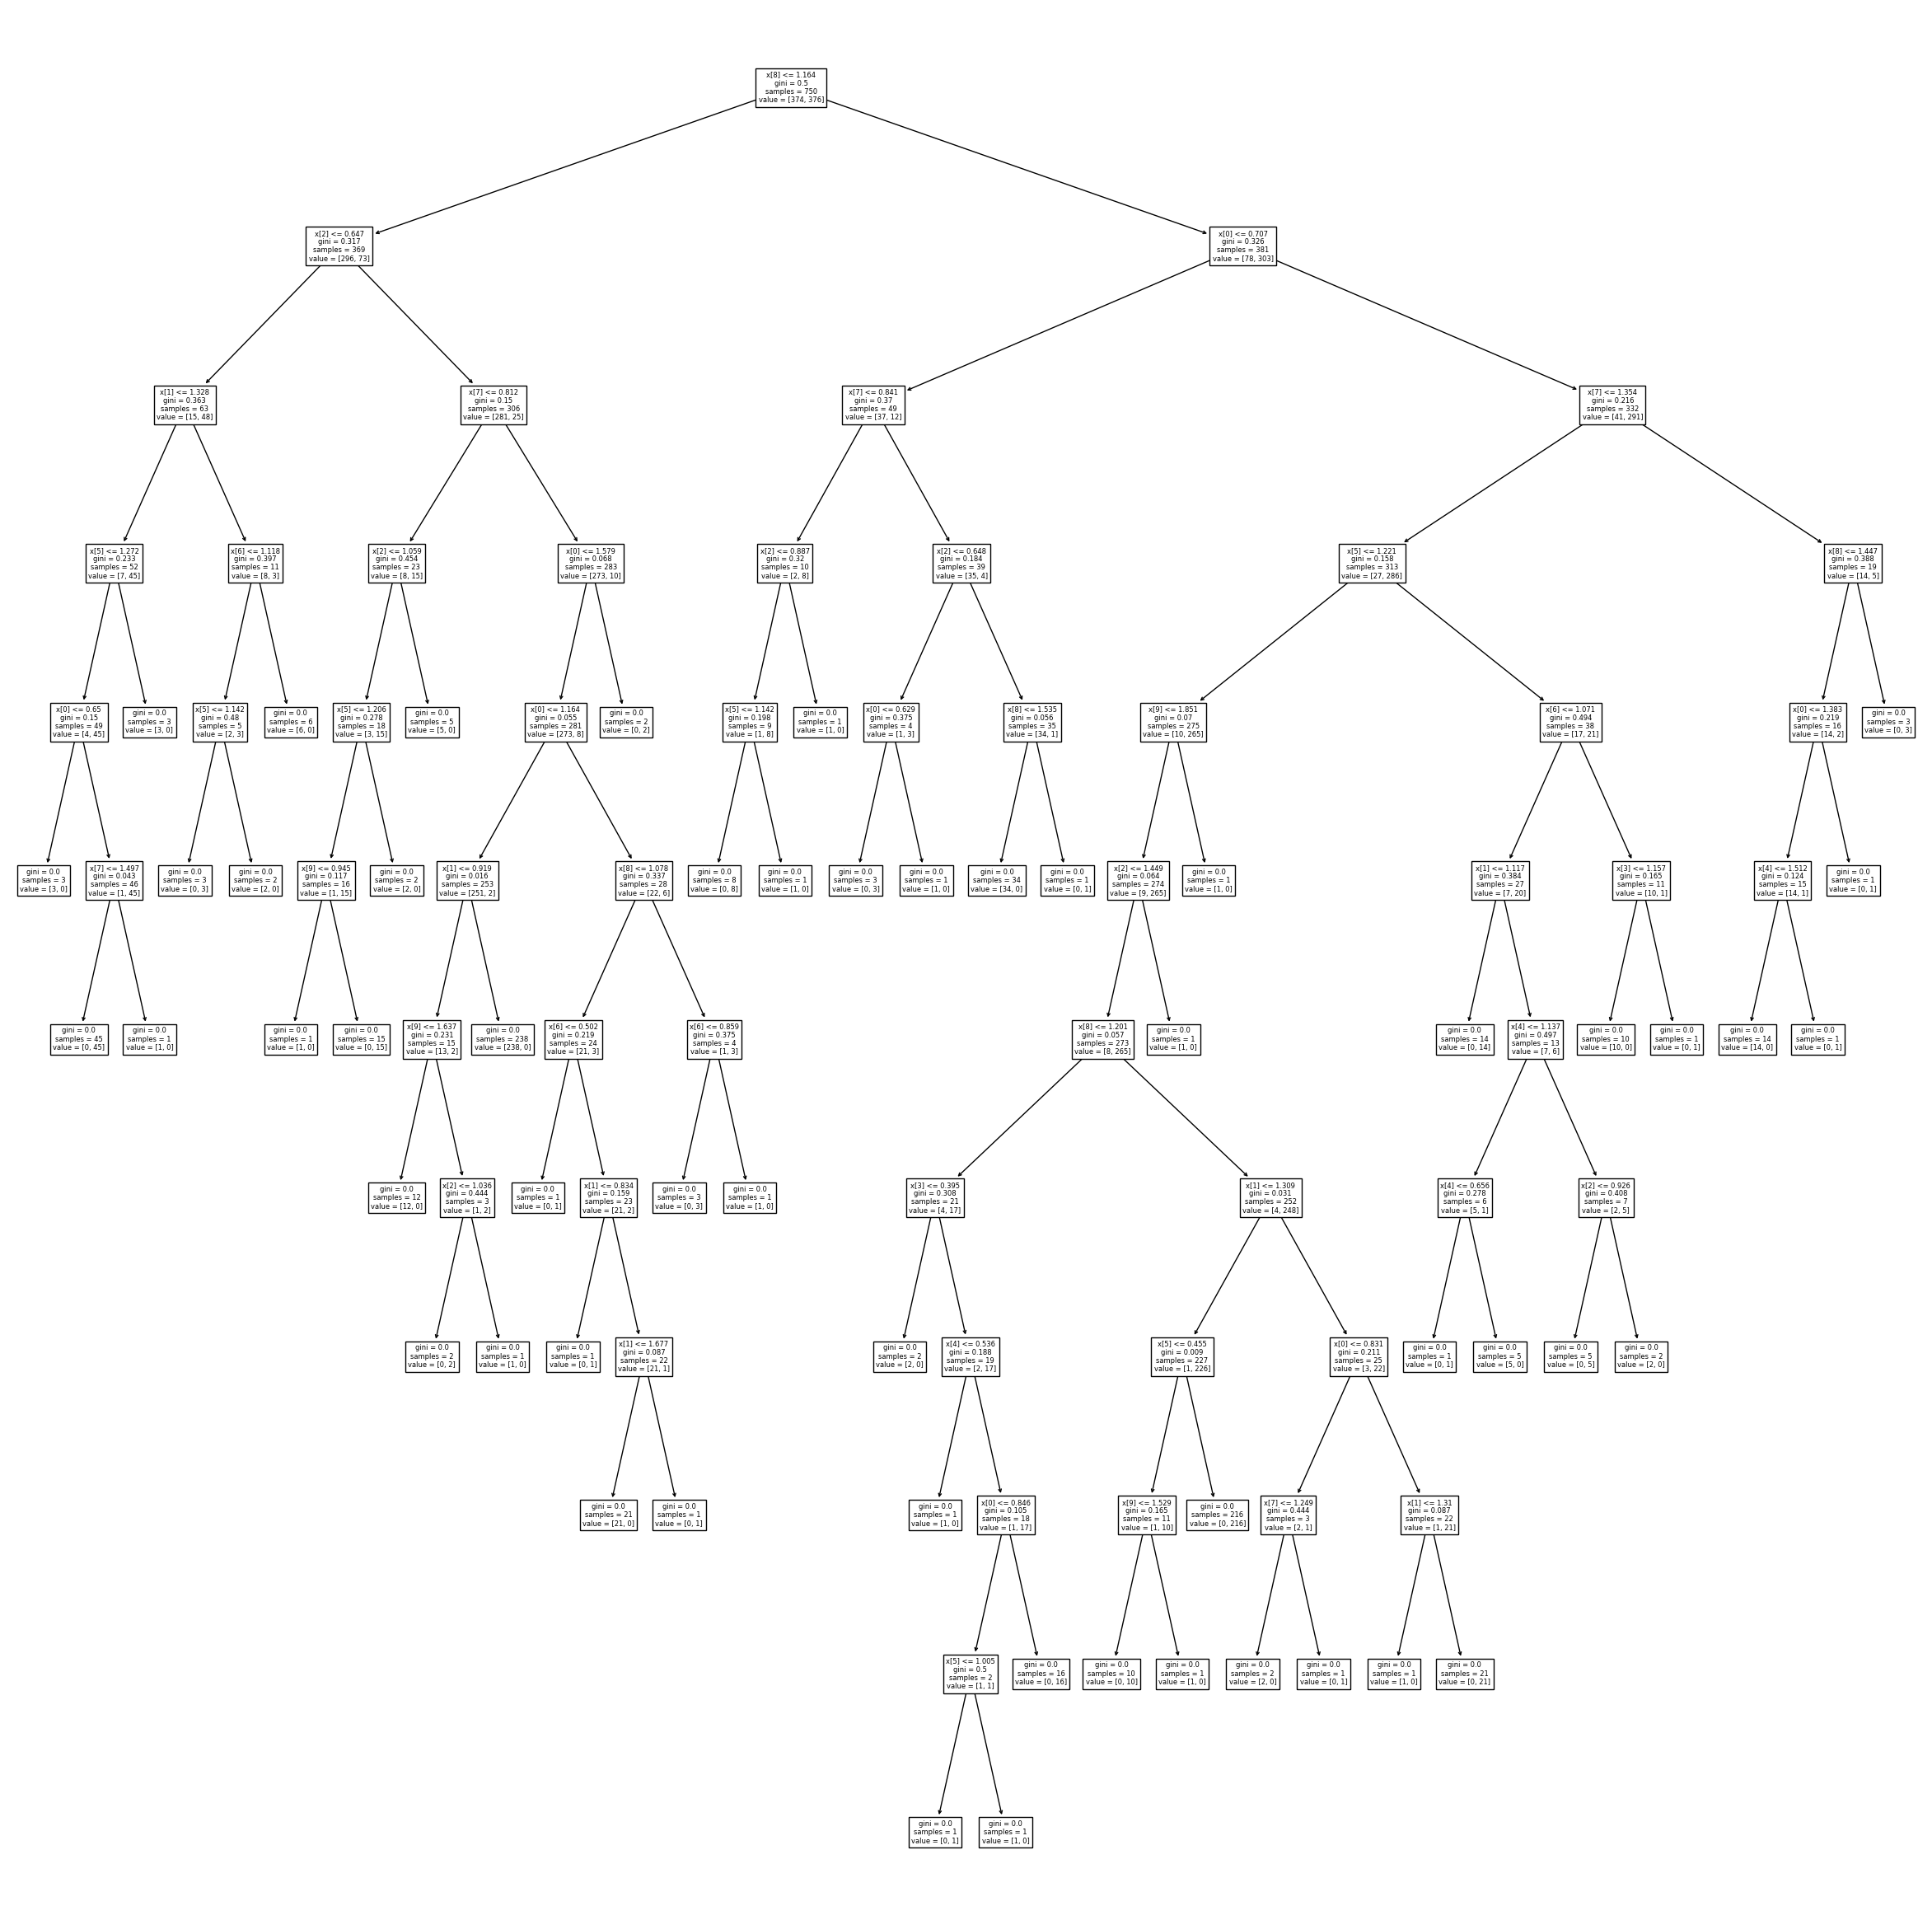

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt
dt_clf = DecisionTreeClassifier()
plt.figure(figsize=(30,30))
dt_clf.fit(X_train,y_train)
plot_tree(dt_clf)
plt.show()

## Questions for Data Scientist
- How to split numerical variable?
- Standardlization?
- How to group/encode categorical variable? --> a frequently discussed issue when talking about implementation
- Other impurity measure or spliting measure? --> Gini index, significance chi-sq independece test...
- Overfitting?  --> prune tree, min # of samples in leaf, minimum gain, max depth of tree or early stop...
- How to get feature importance in tree?

## Pros & Cons
### Pro
- Easy to explain and interpret
- No need for variable selection (relatively)
- Variables can be categorical, ordinal, or continuous
- Robust to outliers
- No distributional assumptions
- Used also as exploratory tool

### Con
- Requires large number of records
- Tree construction can be computationally expensive
- Not useful if rectangles cannot capture data structure

# Discussion
We talked about imbalanced data and how it influence the performance evaluation last time.  
Would this be an issue for the methods we mentioned in this section? How or how not?